<h1>importing the libraries</h1>

In [1]:
from sklearn.svm import SVC
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

<h1>importing the datasets</h1>

In [4]:
data=pd.read_csv("../Data/cleaned_data.csv")
data

MemoryError: Unable to allocate 128. KiB for an array with shape (16384,) and data type int64

<h1>split the data to dependent & independent variables</h1>

In [ ]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

<h1>split the dataset to train & test data</h1>

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.33,random_state=42)

<h1>Standardization</h1>

In [ ]:
scaler=StandardScaler()
scaler.fit_transform(x_train)
scaler.transform(x_test)

array([[-1.07107022e-01, -1.11934000e+00, -8.88773581e-02, ...,
        -1.23966637e-01, -3.93299606e-01,  8.57321842e-04],
       [-1.07107022e-01, -1.11934000e+00, -8.88773581e-02, ...,
        -1.23966637e-01, -3.93299606e-01,  8.57321842e-04],
       [-8.68060343e-02, -3.24692339e-01, -1.97112216e+00, ...,
         6.04381137e-01,  3.47242451e+00, -4.73530845e+00],
       ...,
       [-1.02706913e-01, -1.09391127e+00, -8.88773581e-02, ...,
        -1.04760342e-01,  2.50987747e-01,  8.57321842e-04],
       [-1.06764758e-01, -3.24692339e-01,  5.46255352e+00, ...,
        -1.23843130e-01,  3.90194942e+00,  4.74162131e+00],
       [-9.90317071e-02, -3.07210090e-01, -8.88773581e-02, ...,
        -1.23226125e-01,  7.91777863e-02,  8.57321842e-04]],
      shape=(2363075, 45))

<h1>training the model (DT)</h1>

In [ ]:
classifier=SVC(kernel="linear",random_state=0)
classifier.fit(x_train,y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",10
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'entropy'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metr

<h3>prdeict the test data</h3>

In [ ]:
y_pred=classifier.predict(x_test)

<h2>the metrics </h2>

<h4>the accuracy </h4>

In [ ]:
acc=accuracy_score(y_pred,y_test)
print("the accuracy is:",acc)

the accuracy is: 0.9993402663901908


<h4>the confusion matrix</h4>

In [ ]:
cm=confusion_matrix(y_pred,y_test)
print(cm)

[[  62973    1196]
 [    363 2298543]]


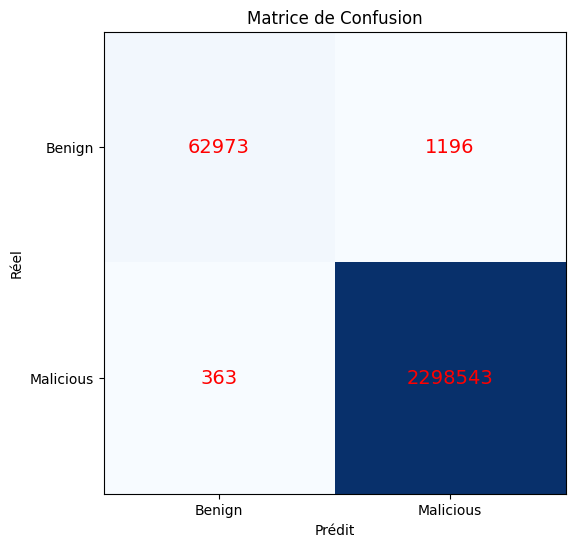

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(cm, cmap=plt.cm.Blues)  # couleur

# Ajouter les valeurs à l’intérieur des cases
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="red", fontsize=14)

# Titres et labels
ax.set_xlabel("Prédit")
ax.set_ylabel("Réel")
ax.set_title("Matrice de Confusion")
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(["Benign", "Malicious"])
ax.set_yticklabels(["Benign", "Malicious"])

plt.show()


On a trouvé que l accuracy de notre model est presque 0.999 ce qui est inquiètant : c'est l accuracy paradox du au diséquilibre de nos données !

<h2>balancing the data</h2>

In [ ]:
model2 =SVC(kernel="rbf",random_state=0)
model2.fit(x_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",10
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'entropy'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",5
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metr

In [ ]:
y_pred2=model2.predict(x_test)


In [ ]:
acc2=accuracy_score(y_pred2,y_test)
print("the accuracy is :",acc2)

the accuracy is : 0.9988210276863833


In [ ]:
cm2=confusion_matrix(y_pred2,y_test)
print(cm2)

[[  60922     372]
 [   2414 2299367]]


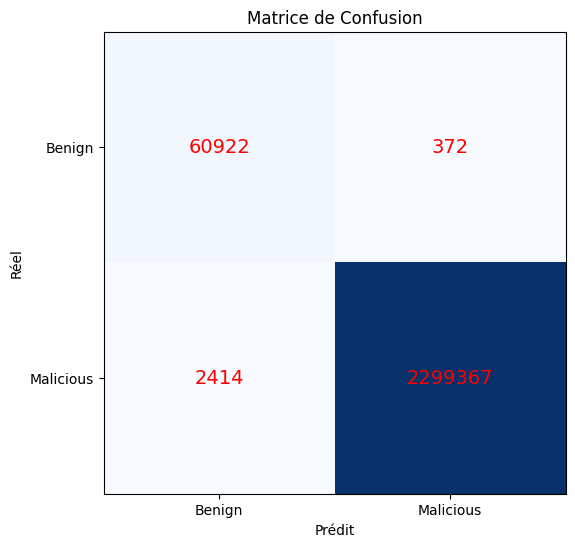

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(cm2, cmap=plt.cm.Blues)  # couleur

# Ajouter les valeurs à l’intérieur des cases
for i in range(cm2.shape[0]):
    for j in range(cm2.shape[1]):
        ax.text(j, i, cm2[i, j], ha="center", va="center", color="red", fontsize=14)

# Titres et labels
ax.set_xlabel("Prédit")
ax.set_ylabel("Réel")
ax.set_title("Matrice de Confusion")
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(["Benign", "Malicious"])
ax.set_yticklabels(["Benign", "Malicious"])

plt.show()


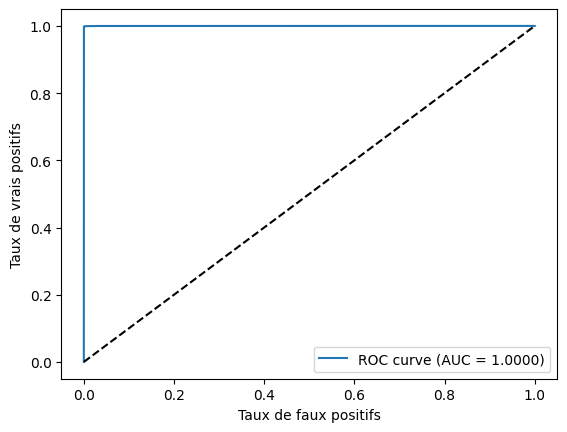

In [ ]:
from sklearn.metrics import roc_curve, auc

y_probs = model2.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--') # Ligne de hasard
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9814    0.9943    0.9878     63336
           1     0.9998    0.9995    0.9997   2299739

    accuracy                         0.9993   2363075
   macro avg     0.9906    0.9969    0.9937   2363075
weighted avg     0.9993    0.9993    0.9993   2363075



<h3>conclusion<h3>

Bien que le modèle affiche une performance statistique remarquable avec une AUC de 0,9896, l'analyse de la matrice de confusion révèle que l'équilibre massif du dataset masque encore plus de 1 000 attaques non détectées. Cette précision quasi parfaite souligne une excellente séparation des classes, mais elle impose de passer au Deep Learning pour affiner la détection et garantir une sécurité réelle en environnement IoMT.